In [301]:
import os
import pandas as pd

In [302]:
CaseName_Base = '9n'
CaseName_ByStages = CaseName_Base + '_ByStages'
# CaseName_ByStages_1 = CaseName_Base + '_ByStages_OC_fy_1'
# CaseName_ByStages_2 = CaseName_Base + '_ByStages_OC_fy_2'
# CaseName_ByStages_3 = CaseName_Base + '_ByStages_OC_fy_3'
# CaseName_ByStages_4 = CaseName_Base + '_ByStages_OC_fy_4'

In [303]:
Folder_A = 'A.The_full_year_MILP'
Folder_B = 'B.Operation_cost'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_G = 'G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
Folder_H = 'H.Representative_days_based_on_Line_Benefit_NN_OC_fy_3'
Folder_I = 'I.Representative_days_based_on_Line_Benefit_NN_OC_fy_4'

In [304]:
DirName  = os.getcwd()

In [305]:
_path_0 = os.path.join(DirName, CaseName_Base)

In [306]:
def LoadingData(dir, folder, case, cat1, cat2, cat3):
    df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', 'oT_Result_CostSummary_'+case+'.csv'), index_col=[0,1])
    df['CaseName'] = folder + ' - ' + case
    df['Category1'] = cat1
    df['Category2'] = cat2
    df['Category3'] = cat3
    df = df.set_index('CaseName', append=True)
    return df

In [307]:
df_A = LoadingData(DirName, Folder_A, CaseName_Base, 'Original', '1.Full Year', '1.OptModel')
# df_B = LoadingData(DirName, Folder_B, CaseName_ByStages)
df_D = LoadingData(DirName, Folder_D, CaseName_ByStages, 'Representative Days', '2.RES and Demand', '1.OptModel')
df_E = LoadingData(DirName, Folder_E, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '1.OptModel')
df_F = LoadingData(DirName, Folder_F, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_1')
df_G = LoadingData(DirName, Folder_G, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_2')
df_H = LoadingData(DirName, Folder_H, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_3')
df_I = LoadingData(DirName, Folder_I, CaseName_ByStages, 'Representative Days', '3.Line Benefits', '2.NN_4')

In [308]:
df = pd.concat([df_A, df_D, df_E, df_F, df_G, df_H, df_I], axis=0)

In [309]:
# select the row Total System Cost of dataframe df
df = df.reset_index()

In [310]:
df= df[['Cost/Payment','CaseName','MEUR', 'Category1', 'Category2', 'Category3']]

In [311]:
df = df.loc[df['Cost/Payment'] == 'Total          System Cost']

In [312]:
df = pd.pivot_table(df, values='MEUR', index=['CaseName', 'Category1', 'Category2', 'Category3'], aggfunc='first')

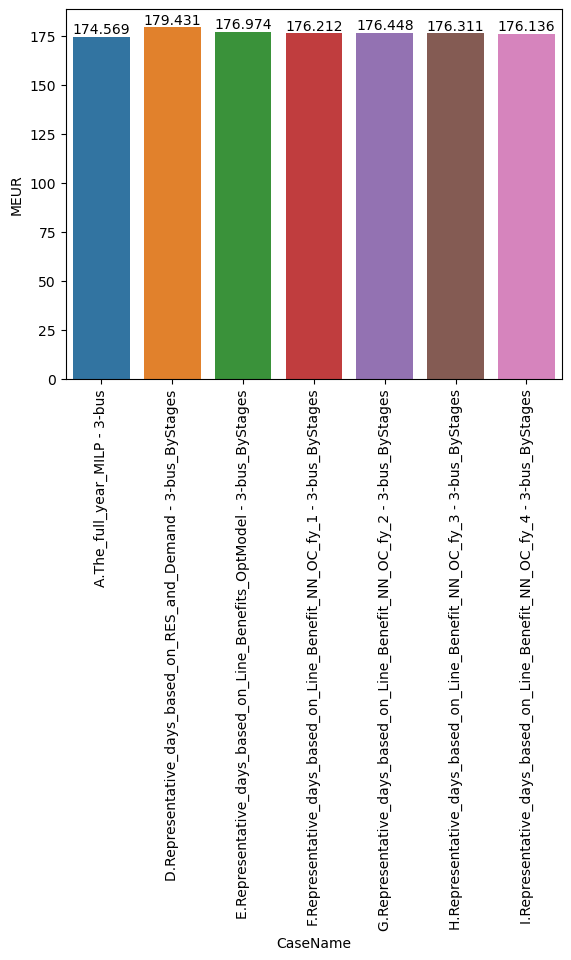

In [313]:
# import the necessary python packages
import seaborn as sns
import numpy as np

 
# create a bar plot by specifying
# x and y axis and the data to be used.
ax = sns.barplot(x='CaseName', y='MEUR', data=df.reset_index(),
                 errwidth=0)
 
# sns.barplot method will return a list of
# sub methods use containers method to access
# the text label of each bar by passing it
# through the ax.bar_label function use for
# loop to iterate through the list of
# labels and assign each bar to a different
# label.
for i in ax.containers:
    ax.bar_label(i,)
ax.tick_params(axis='x', rotation=90)

In [314]:
df.reset_index()

,CaseName,Category1,Category2,Category3,MEUR
0,A.The_full_year_MILP - 3-bus,Original,1.Full Year,1.OptModel,174.568533
1,D.Representative_days_based_on_RES_and_Demand ...,Representative Days,2.RES and Demand,1.OptModel,179.430733
2,E.Representative_days_based_on_Line_Benefits_O...,Representative Days,3.Line Benefits,1.OptModel,176.973824
3,F.Representative_days_based_on_Line_Benefit_NN...,Representative Days,3.Line Benefits,2.NN_1,176.211514
4,G.Representative_days_based_on_Line_Benefit_NN...,Representative Days,3.Line Benefits,2.NN_2,176.447914
5,H.Representative_days_based_on_Line_Benefit_NN...,Representative Days,3.Line Benefits,2.NN_3,176.310890
6,I.Representative_days_based_on_Line_Benefit_NN...,Representative Days,3.Line Benefits,2.NN_4,176.135672


In [315]:
import altair as alt


# # base = alt.Chart(df.reset_index()).mark_bar(
# #     cornerRadiusTopLeft=3,
# #     cornerRadiusTopRight=3
# # ).encode(
# #     x='Category2:O',
# #     y='MEUR:Q',
# #     color='Category1:N',
# #     column='Category3:N',
# #     text='MEUR:Q'
# # )
# bars = alt.Chart(df.reset_index()).mark_bar().encode(
#     # x='Category2:O',
#     x = alt.X('Category3:O').title(''),
#     y='MEUR:Q',
#     color=alt.Color('Category1:N').title(''),
#     # column='Category3:N',
#     column = alt.Column('Category2:N').title('')
# )

# # text = alt.Chart.mark_text(base, align="center", baseline="bottom").encode(text=alt.Text("MEUR:Q", format=",.0f"))

# # alt.layer(horse, miles, data=cars).facet(column='Origin')

# text = bars.mark_text(
#     # align='left',
#     # baseline='middle',
#     dx=3  # Nudges text to right so it doesn't appear on top of the bar
# ).encode(
#     text='MEUR:Q'
# )

# # base.mark_bar(cornerRadiusTopLeft=3, cornerRadiusTopRight=3)
# (bars + text).properties(height=900)

base = alt.Chart(df.reset_index()).encode(
    alt.X("Category3:O").title(''),
    alt.Y("sum(MEUR):Q").title('MEUR'),
    alt.Color("Category1:N").title(''),
    alt.Text("sum(MEUR):Q", format=".0f"),
)

alt.layer(
    base.mark_bar(),
    base.mark_text(dy=-10)
).facet(
    alt.Column("Category2:N", title=None)
).configure_facet(spacing=0).resolve_scale(
  x='independent'
)


alt.FacetChart(...)